In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
import seaborn as sb
from sklearn.model_selection import train_test_split
from datetime import datetime as dt
import seaborn as sns
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split
import xgboost as xgb
import texttable
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as  mae
from sklearn.metrics import mean_squared_error as mse
from tqdm import tqdm
import plotly.express as px
import pickle
from sklearn.feature_selection import SelectKBest, f_regression
import datetime
from sklearn.feature_selection import RFE 
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm_notebook
from itertools import combinations
from tqdm import tqdm
plt.rcParams["figure.figsize"] = (20,7)


In [2]:
data= pd.read_csv(r'C:\Users\LEGION\Desktop\MASTER\s3\Projet 2\New data\data_from_data_from_GLODAPv2.2022.csv',sep = ',')


In [4]:
data=data.replace(-999,np.nan)


In [5]:
data.isnull().sum()

Cruise                           0
Station                          0
Type                             0
mon/day/yr                       0
hh:mm                        17365
Longitude [degrees_east]         0
Latitude [degrees_north]         0
PRESSURE [DBAR]               5125
DEPTH [M]                        0
TEMPERATURE [DEG C]           7449
SALNTY [PSS-78]              25737
OXYGEN [UMOL/KG]            142135
PHSPHT [UMOL/KG]            325148
SILCAT [UMOL/KG]            272802
NITRAT [UMOL/KG]            268377
NITRIT [UMOL/KG]            562570
ALKALI [UMOL/KG]            877098
TCARBN [UMOL/KG]            828297
pH~_T [p=0,T=25,S]          882117
dtype: int64

In [6]:
data.drop(columns=['Cruise','Type','Station'],inplace=True)
data.isnull().sum()

mon/day/yr                       0
hh:mm                        17365
Longitude [degrees_east]         0
Latitude [degrees_north]         0
PRESSURE [DBAR]               5125
DEPTH [M]                        0
TEMPERATURE [DEG C]           7449
SALNTY [PSS-78]              25737
OXYGEN [UMOL/KG]            142135
PHSPHT [UMOL/KG]            325148
SILCAT [UMOL/KG]            272802
NITRAT [UMOL/KG]            268377
NITRIT [UMOL/KG]            562570
ALKALI [UMOL/KG]            877098
TCARBN [UMOL/KG]            828297
pH~_T [p=0,T=25,S]          882117
dtype: int64

In [7]:
data.rename(columns={'Longitude [degrees_east]': 'Longitude', 'Latitude [degrees_north]': 'Latitude', 'PRESSURE [DBAR]': 'PRS', 'DEPTH [M]': 'DEPTH', 'TEMPERATURE [DEG C]': 'TMP', 'SALNTY [PSS-78]': 'SALNTY', 'OXYGEN [UMOL/KG]': 'OXYGEN', 'PHSPHT [UMOL/KG]': 'PHSPHT', 'SILCAT [UMOL/KG]': 'SILCAT', 'NITRAT [UMOL/KG]': 'NITRAT', 'ALKALI [UMOL/KG]': 'ALKALI', 'TCARBN [UMOL/KG]': 'TCARBN', 'pH~_T [p=0,T=25,S]': 'PH','NITRIT [UMOL/KG]':'NITRIT'}, inplace=True)

In [8]:
data

,mon/day/yr,hh:mm,Longitude,Latitude,PRS,DEPTH,TMP,SALNTY,OXYGEN,PHSPHT,SILCAT,NITRAT,NITRIT,ALKALI,TCARBN,PH
0,07/20/1984,14:46:00,7.23,80.57,8.60,9.00,0.40,33.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,07/20/1984,14:46:00,7.23,80.57,8.60,9.00,0.54,33.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,07/20/1984,14:46:00,7.23,80.57,48.90,48.00,2.36,34.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,07/20/1984,14:46:00,7.23,80.57,48.90,48.00,2.36,34.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,07/20/1984,14:46:00,7.23,80.57,148.00,146.00,2.47,34.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353660,11/16/2021,NaN,5.24,60.19,102.11,101.00,11.37,33.55,NaN,NaN,NaN,NaN,NaN,2289.58,2115.63,NaN
1353661,11/16/2021,NaN,5.24,60.19,127.60,126.00,9.09,34.51,NaN,NaN,NaN,NaN,NaN,2305.12,2166.79,NaN
1353662,11/16/2021,NaN,5.24,60.19,202.94,201.00,8.07,34.99,NaN,NaN,NaN,NaN,NaN,2315.79,2181.15,NaN
1353663,11/16/2021,NaN,5.24,60.19,304.82,302.00,7.56,35.11,NaN,NaN,NaN,NaN,NaN,2319.53,2178.42,NaN


In [9]:
data.reset_index(inplace=True,drop=True)

In [12]:
data_ts= data.loc[:,['mon/day/yr','hh:mm','Longitude','Latitude','DEPTH',"TMP","PHSPHT" , 'NITRAT', 'TCARBN','SILCAT','PH']]

In [13]:
data_ts.dropna(inplace=True)
data_ts.reset_index(inplace=True,drop=True)

In [15]:
data_ts['mon/day/yr'] = pd.to_datetime(data_ts['mon/day/yr'], format='%m/%d/%Y')
data_ts['hh:mm'] = pd.to_datetime(data_ts['hh:mm'], format='%H:%M:%S').dt.time


In [16]:
data_ts

,mon/day/yr,hh:mm,Longitude,Latitude,DEPTH,TMP,PHSPHT,NITRAT,TCARBN,SILCAT,PH
0,1996-07-24,00:00:00,64.87,81.38,4.00,-1.28,0.21,1.33,2056.60,2.34,7.83
1,1996-07-24,00:00:00,64.87,81.38,15.00,-1.29,0.25,1.84,2068.40,2.54,7.82
2,1996-07-24,00:00:00,64.87,81.38,25.00,-1.12,0.39,4.71,2104.10,3.22,7.77
3,1996-07-24,00:00:00,64.87,81.38,35.00,-1.40,0.54,7.68,2120.50,3.80,7.74
4,1996-07-24,00:00:00,64.87,81.38,45.00,-1.52,0.60,9.22,2131.70,4.39,7.72
...,...,...,...,...,...,...,...,...,...,...,...
360396,2021-05-07,15:33:00,149.02,40.01,4503.00,1.49,2.49,35.78,2322.50,150.29,7.59
360397,2021-05-07,15:33:00,149.02,40.01,4750.00,1.50,2.49,35.61,2319.20,150.56,7.59
360398,2021-05-07,15:33:00,149.02,40.01,5004.00,1.52,2.47,35.52,2318.30,149.39,7.59
360399,2021-05-07,15:33:00,149.02,40.01,5251.00,1.55,2.47,35.44,2318.20,148.15,7.59


In [17]:
data_ts['mon/day/yr'] = data_ts['mon/day/yr'].astype(str) + ' ' + data_ts['hh:mm'].astype(str)

In [18]:
data_ts

,mon/day/yr,hh:mm,Longitude,Latitude,DEPTH,TMP,PHSPHT,NITRAT,TCARBN,SILCAT,PH
0,1996-07-24 00:00:00,00:00:00,64.87,81.38,4.00,-1.28,0.21,1.33,2056.60,2.34,7.83
1,1996-07-24 00:00:00,00:00:00,64.87,81.38,15.00,-1.29,0.25,1.84,2068.40,2.54,7.82
2,1996-07-24 00:00:00,00:00:00,64.87,81.38,25.00,-1.12,0.39,4.71,2104.10,3.22,7.77
3,1996-07-24 00:00:00,00:00:00,64.87,81.38,35.00,-1.40,0.54,7.68,2120.50,3.80,7.74
4,1996-07-24 00:00:00,00:00:00,64.87,81.38,45.00,-1.52,0.60,9.22,2131.70,4.39,7.72
...,...,...,...,...,...,...,...,...,...,...,...
360396,2021-05-07 15:33:00,15:33:00,149.02,40.01,4503.00,1.49,2.49,35.78,2322.50,150.29,7.59
360397,2021-05-07 15:33:00,15:33:00,149.02,40.01,4750.00,1.50,2.49,35.61,2319.20,150.56,7.59
360398,2021-05-07 15:33:00,15:33:00,149.02,40.01,5004.00,1.52,2.47,35.52,2318.30,149.39,7.59
360399,2021-05-07 15:33:00,15:33:00,149.02,40.01,5251.00,1.55,2.47,35.44,2318.20,148.15,7.59


In [19]:
data_ts['mon/day/yr'] = pd.to_datetime(data_ts['mon/day/yr'])


In [20]:
data_ts.drop_duplicates(subset=['mon/day/yr'],keep='first',inplace=True)

In [21]:
data_ts

,mon/day/yr,hh:mm,Longitude,Latitude,DEPTH,TMP,PHSPHT,NITRAT,TCARBN,SILCAT,PH
0,1996-07-24 00:00:00,00:00:00,64.87,81.38,4.00,-1.28,0.21,1.33,2056.60,2.34,7.83
49,1996-07-25 00:00:00,00:00:00,68.34,81.35,10.00,-1.76,0.43,5.33,2095.20,2.44,7.78
110,1996-07-26 00:00:00,00:00:00,72.02,81.29,10.00,-1.79,0.42,4.40,2114.20,3.22,7.75
144,1996-07-27 00:00:00,00:00:00,73.79,81.43,10.00,-1.80,0.32,4.10,2119.30,3.41,7.75
190,1996-07-28 00:00:00,00:00:00,74.76,81.42,10.00,-1.59,0.58,6.66,2147.10,4.10,7.72
...,...,...,...,...,...,...,...,...,...,...,...
360218,2021-04-28 03:41:00,03:41:00,145.00,40.01,0.00,16.49,0.28,3.02,2039.00,5.40,7.96
360254,2021-05-02 03:39:00,03:39:00,159.67,40.01,0.00,12.78,0.62,7.05,2068.90,12.51,7.88
360291,2021-05-03 03:25:00,03:25:00,164.97,40.02,0.00,14.18,0.35,3.81,2050.30,8.23,7.93
360328,2021-05-06 03:40:00,03:40:00,154.31,40.00,0.00,11.01,0.62,7.27,2069.80,14.29,7.87


In [22]:
data_ts.reset_index(inplace=True,drop=True)


In [23]:
data_ts

,mon/day/yr,hh:mm,Longitude,Latitude,DEPTH,TMP,PHSPHT,NITRAT,TCARBN,SILCAT,PH
0,1996-07-24 00:00:00,00:00:00,64.87,81.38,4.00,-1.28,0.21,1.33,2056.60,2.34,7.83
1,1996-07-25 00:00:00,00:00:00,68.34,81.35,10.00,-1.76,0.43,5.33,2095.20,2.44,7.78
2,1996-07-26 00:00:00,00:00:00,72.02,81.29,10.00,-1.79,0.42,4.40,2114.20,3.22,7.75
3,1996-07-27 00:00:00,00:00:00,73.79,81.43,10.00,-1.80,0.32,4.10,2119.30,3.41,7.75
4,1996-07-28 00:00:00,00:00:00,74.76,81.42,10.00,-1.59,0.58,6.66,2147.10,4.10,7.72
...,...,...,...,...,...,...,...,...,...,...,...
16324,2021-04-28 03:41:00,03:41:00,145.00,40.01,0.00,16.49,0.28,3.02,2039.00,5.40,7.96
16325,2021-05-02 03:39:00,03:39:00,159.67,40.01,0.00,12.78,0.62,7.05,2068.90,12.51,7.88
16326,2021-05-03 03:25:00,03:25:00,164.97,40.02,0.00,14.18,0.35,3.81,2050.30,8.23,7.93
16327,2021-05-06 03:40:00,03:40:00,154.31,40.00,0.00,11.01,0.62,7.27,2069.80,14.29,7.87


In [24]:
data_ts.index=data_ts["mon/day/yr"]

In [25]:
data_ts

,mon/day/yr,hh:mm,Longitude,Latitude,DEPTH,TMP,PHSPHT,NITRAT,TCARBN,SILCAT,PH
mon/day/yr,,,,,,,,,,,
1996-07-24 00:00:00,1996-07-24 00:00:00,00:00:00,64.87,81.38,4.00,-1.28,0.21,1.33,2056.60,2.34,7.83
1996-07-25 00:00:00,1996-07-25 00:00:00,00:00:00,68.34,81.35,10.00,-1.76,0.43,5.33,2095.20,2.44,7.78
1996-07-26 00:00:00,1996-07-26 00:00:00,00:00:00,72.02,81.29,10.00,-1.79,0.42,4.40,2114.20,3.22,7.75
1996-07-27 00:00:00,1996-07-27 00:00:00,00:00:00,73.79,81.43,10.00,-1.80,0.32,4.10,2119.30,3.41,7.75
1996-07-28 00:00:00,1996-07-28 00:00:00,00:00:00,74.76,81.42,10.00,-1.59,0.58,6.66,2147.10,4.10,7.72
...,...,...,...,...,...,...,...,...,...,...,...
2021-04-28 03:41:00,2021-04-28 03:41:00,03:41:00,145.00,40.01,0.00,16.49,0.28,3.02,2039.00,5.40,7.96
2021-05-02 03:39:00,2021-05-02 03:39:00,03:39:00,159.67,40.01,0.00,12.78,0.62,7.05,2068.90,12.51,7.88
2021-05-03 03:25:00,2021-05-03 03:25:00,03:25:00,164.97,40.02,0.00,14.18,0.35,3.81,2050.30,8.23,7.93


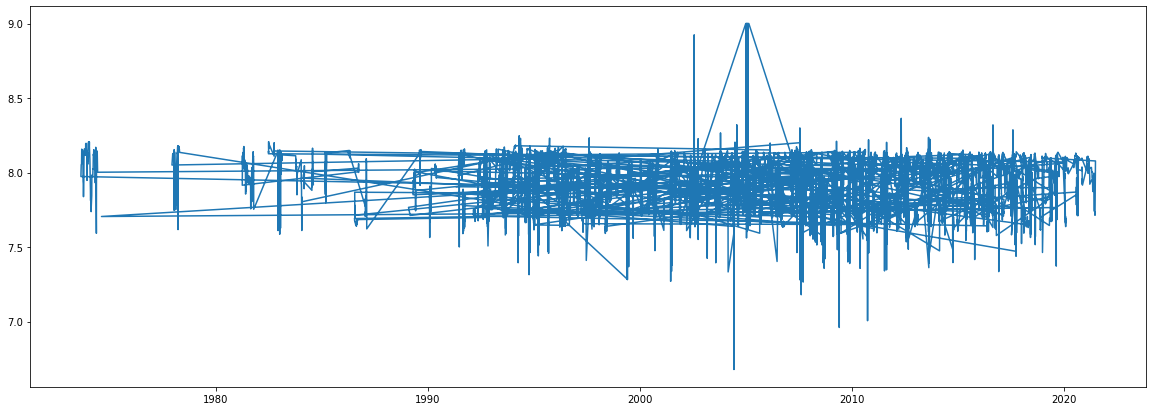

In [32]:
plt.plot(data_ts["PH"])

In [33]:
data_ts.drop(columns=['mon/day/yr','hh:mm'],inplace=True)

In [34]:
def df_to_X_y(df, window_size=7):
    df_as_np=df.to_numpy()
    X = []
    y = []
    for i in range (len (df_as_np)-window_size):
        row =[r for r in df_as_np[i:i+window_size]]
        X.append(row)
        label=df_as_np[i+window_size][-1]
        y.append(label)
    return np.array(X), np.array(y)

In [35]:
size=len(data_ts)

In [36]:
size=int(size)

In [37]:
size

16329

In [38]:
X,y = df_to_X_y(data_ts[:size])

In [39]:
X.shape , y.shape

((16322, 7, 9), (16322,))

In [40]:
X_train , y_train = X[:int(size-size/4)],y[:int(size-size/4)]
X_val , y_val = X[int(size-size/4):int((size/6)+(size-size/4))],y[int(size-size/4):int((size/6)+(size-size/4))]
X_test , y_test = X[int((size/6)+(size-size/4)):],y[int((size/6)+(size-size/4)):]


In [41]:
X_train.shape ,X_val.shape , X_test.shape

((12246, 7, 9), (2722, 7, 9), (1354, 7, 9))

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam


In [67]:
model = Sequential()
model.add(InputLayer((7, 9)))
model.add(LSTM(512))
model.add(Dense(256, 'relu'))
model.add(Dense(128, 'LeakyReLU'))
model.add(Dense(64, 'relu'))

model.add(Dense(1, 'linear'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 512)               1069056   
                                                                 
 dense_15 (Dense)            (None, 256)               131328    
                                                                 
 dense_16 (Dense)            (None, 128)               32896     
                                                                 
 dense_17 (Dense)            (None, 64)                8256      
                                                                 
 dense_18 (Dense)            (None, 1)                 65        
                                                                 
Total params: 1,241,601
Trainable params: 1,241,601
Non-trainable params: 0
_________________________________________________________________


In [68]:
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [69]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=500)

Epoch 1/500
383/383 [==============================] - 33s 77ms/step - loss: 0.5858 - root_mean_squared_error: 0.7654 - val_loss: 0.0134 - val_root_mean_squared_error: 0.1157
Epoch 2/500
383/383 [==============================] - 31s 80ms/step - loss: 0.0157 - root_mean_squared_error: 0.1251 - val_loss: 0.0069 - val_root_mean_squared_error: 0.0832
Epoch 3/500
383/383 [==============================] - 26s 67ms/step - loss: 0.0139 - root_mean_squared_error: 0.1179 - val_loss: 0.0072 - val_root_mean_squared_error: 0.0849
Epoch 4/500
383/383 [==============================] - 25s 65ms/step - loss: 0.0140 - root_mean_squared_error: 0.1184 - val_loss: 0.0080 - val_root_mean_squared_error: 0.0896
Epoch 5/500
383/383 [==============================] - 27s 71ms/step - loss: 0.0140 - root_mean_squared_error: 0.1182 - val_loss: 0.0069 - val_root_mean_squared_error: 0.0828
Epoch 6/500
383/383 [==============================] - 27s 70ms/step - loss: 0.0146 - root_mean_squared_error: 0.1207 - val_l

In [70]:
def plot_predictions1(model, X, y, start=0, end=50000):
        predictions = model.predict(X).flatten()
        df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
        plt.plot(df['Predictions'][start:end])
        plt.plot(df['Actuals'][start:end],alpha=0.5)
        return df, r2_score(y, predictions)

43/43 [==============================] - 2s 20ms/step


(      Predictions  Actuals
 0            8.07     8.12
 1            8.07     8.13
 2            8.07     8.11
 3            8.07     8.08
 4            8.07     8.09
 ...           ...      ...
 1349         7.91     7.96
 1350         7.92     7.88
 1351         7.91     7.93
 1352         7.91     7.87
 1353         7.91     7.93
 
 [1354 rows x 2 columns],
 0.6888936636903192)

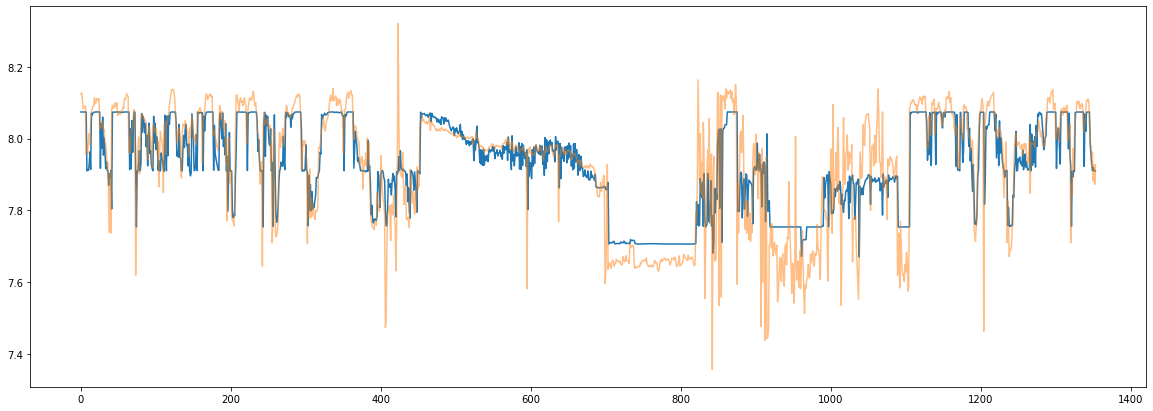

In [71]:
plot_predictions1(model, X_test, y_test)

In [57]:
model = Sequential()
model.add(InputLayer((7, 9)))

model.add(GRU(256))
model.add(Dense(128, 'LeakyReLU'))
model.add(Dense(64, 'relu'))
model.add(Dense(1, 'linear'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 256)               205056    
                                                                 
 dense_9 (Dense)             (None, 128)               32896     
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 246,273
Trainable params: 246,273
Non-trainable params: 0
_________________________________________________________________


In [58]:
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [62]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=1000)

Epoch 1/1000
383/383 [==============================] - 5s 13ms/step - loss: 0.0102 - root_mean_squared_error: 0.1011 - val_loss: 0.0085 - val_root_mean_squared_error: 0.0925
Epoch 2/1000
383/383 [==============================] - 5s 13ms/step - loss: 0.0103 - root_mean_squared_error: 0.1013 - val_loss: 0.0089 - val_root_mean_squared_error: 0.0946
Epoch 3/1000
383/383 [==============================] - 5s 13ms/step - loss: 0.0104 - root_mean_squared_error: 0.1022 - val_loss: 0.0071 - val_root_mean_squared_error: 0.0841
Epoch 4/1000
383/383 [==============================] - 5s 13ms/step - loss: 0.0103 - root_mean_squared_error: 0.1013 - val_loss: 0.0072 - val_root_mean_squared_error: 0.0850
Epoch 5/1000
383/383 [==============================] - 5s 13ms/step - loss: 0.0105 - root_mean_squared_error: 0.1025 - val_loss: 0.0078 - val_root_mean_squared_error: 0.0881
Epoch 6/1000
383/383 [==============================] - 5s 12ms/step - loss: 0.0106 - root_mean_squared_error: 0.1028 - val_l

In [46]:
def plot_predictions1(model, X, y, start=0, end=50000):
        predictions = model.predict(X).flatten()
        df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
        plt.plot(df['Predictions'][start:end])
        plt.plot(df['Actuals'][start:end],alpha=0.5)
        return df, r2_score(y, predictions)

43/43 [==============================] - 0s 6ms/step


(      Predictions  Actuals
 0            8.12     8.12
 1            8.12     8.13
 2            8.12     8.11
 3            8.12     8.08
 4            8.12     8.09
 ...           ...      ...
 1349         8.02     7.96
 1350         8.03     7.88
 1351         7.97     7.93
 1352         8.00     7.87
 1353         8.00     7.93
 
 [1354 rows x 2 columns],
 0.5996139770783647)

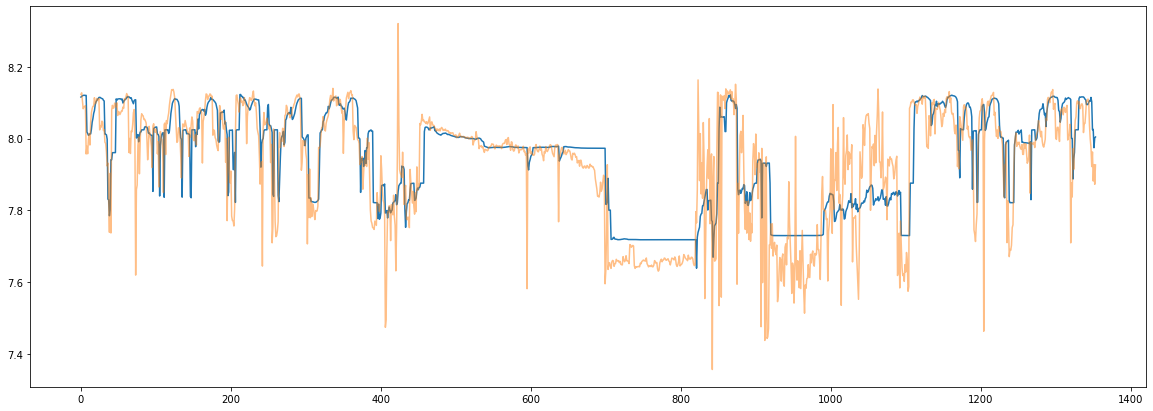

In [64]:
plot_predictions1(model, X_test, y_test)

In [ ]:
model = Sequential()
model.add(InputLayer((7, 9)))

model.add((256))
model.add(Dense(128, 'LeakyReLU'))
model.add(Dense(64, 'relu'))
model.add(Dense(1, 'linear'))

model.summary()

In [43]:
model = Sequential()
model.add(InputLayer((7, 9)))
model.add(Conv1D(64, kernel_size=2, activation='relu'))
model.add(Flatten())
model.add(Dense(256, 'LeakyReLU'))
model.add(Dense(128, 'relu'))
model.add(Dense(1, 'linear'))
model.summary()
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 6, 64)             1216      
                                                                 
 flatten (Flatten)           (None, 384)               0         
                                                                 
 dense (Dense)               (None, 256)               98560     
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 132,801
Trainable params: 132,801
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=2000)

Epoch 1/2000
383/383 [==============================] - 2s 5ms/step - loss: 9.9040e-04 - root_mean_squared_error: 0.0315 - val_loss: 0.0104 - val_root_mean_squared_error: 0.1019
Epoch 2/2000
383/383 [==============================] - 2s 5ms/step - loss: 7.8207e-04 - root_mean_squared_error: 0.0280 - val_loss: 0.0103 - val_root_mean_squared_error: 0.1013
Epoch 3/2000
383/383 [==============================] - 2s 5ms/step - loss: 8.8586e-04 - root_mean_squared_error: 0.0298 - val_loss: 0.0104 - val_root_mean_squared_error: 0.1022
Epoch 4/2000
383/383 [==============================] - 2s 5ms/step - loss: 7.4455e-04 - root_mean_squared_error: 0.0273 - val_loss: 0.0117 - val_root_mean_squared_error: 0.1083
Epoch 5/2000
383/383 [==============================] - 2s 5ms/step - loss: 8.6996e-04 - root_mean_squared_error: 0.0295 - val_loss: 0.0097 - val_root_mean_squared_error: 0.0987
Epoch 6/2000
383/383 [==============================] - 2s 4ms/step - loss: 8.2798e-04 - root_mean_squared_err

43/43 [==============================] - 0s 2ms/step


(      Predictions  Actuals
 0            8.10     8.12
 1            8.13     8.13
 2            8.15     8.11
 3            8.12     8.08
 4            8.09     8.09
 ...           ...      ...
 1349         7.95     7.96
 1350         7.96     7.88
 1351         7.89     7.93
 1352         7.92     7.87
 1353         7.88     7.93
 
 [1354 rows x 2 columns],
 0.5643518650609388)

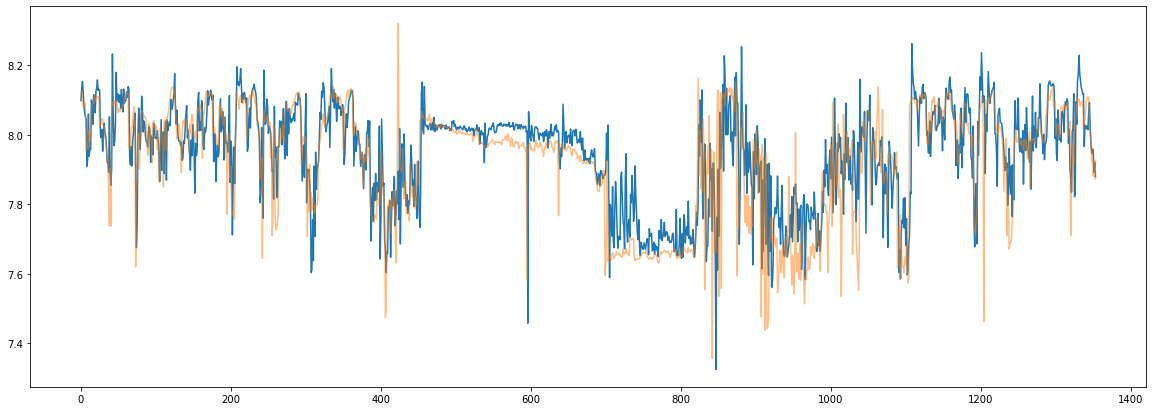

In [60]:
plot_predictions1(model, X_test, y_test)

In [59]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=1000)

Epoch 1/1000
383/383 [==============================] - 2s 5ms/step - loss: 5.9590e-04 - root_mean_squared_error: 0.0244 - val_loss: 0.0219 - val_root_mean_squared_error: 0.1481
Epoch 2/1000
383/383 [==============================] - 2s 5ms/step - loss: 6.3684e-04 - root_mean_squared_error: 0.0252 - val_loss: 0.0199 - val_root_mean_squared_error: 0.1410
Epoch 3/1000
383/383 [==============================] - 2s 5ms/step - loss: 6.4107e-04 - root_mean_squared_error: 0.0253 - val_loss: 0.0220 - val_root_mean_squared_error: 0.1484
Epoch 4/1000
383/383 [==============================] - 2s 5ms/step - loss: 6.4176e-04 - root_mean_squared_error: 0.0253 - val_loss: 0.0259 - val_root_mean_squared_error: 0.1610
Epoch 5/1000
383/383 [==============================] - 2s 5ms/step - loss: 6.2882e-04 - root_mean_squared_error: 0.0251 - val_loss: 0.0233 - val_root_mean_squared_error: 0.1527
Epoch 6/1000
383/383 [==============================] - 2s 5ms/step - loss: 6.3891e-04 - root_mean_squared_err

In [62]:
keys=['LSTM','GRU','CONV1D']
R2_scores=[0.69,0.60,0.57]

In [63]:
t=texttable.Texttable()

t.add_rows([[*['Modèle \n---------\n Score'],*(np.array(keys))],
            [*['R²'],*(np.array(list(R2_scores)))],
            
            
])

print(t.draw())

+-----------+-------+-------+--------+
|  Modèle   | LSTM  |  GRU  | CONV1D |
| --------- |       |       |        |
|   Score   |       |       |        |
+===========+=======+=======+========+
| R²        | 0.690 | 0.600 | 0.570  |
+-----------+-------+-------+--------+
